# <font color = red>Recommendation Engine : Hollywood Movies</font>

<font color=green>__Recommendation Engine__ :</font> 

> _Wondered how movies on any app/website like Netflix,Hotstar or even Google recommends movies. After this notebook I think everyone would be able create a recommendation. Lets get started..._ 


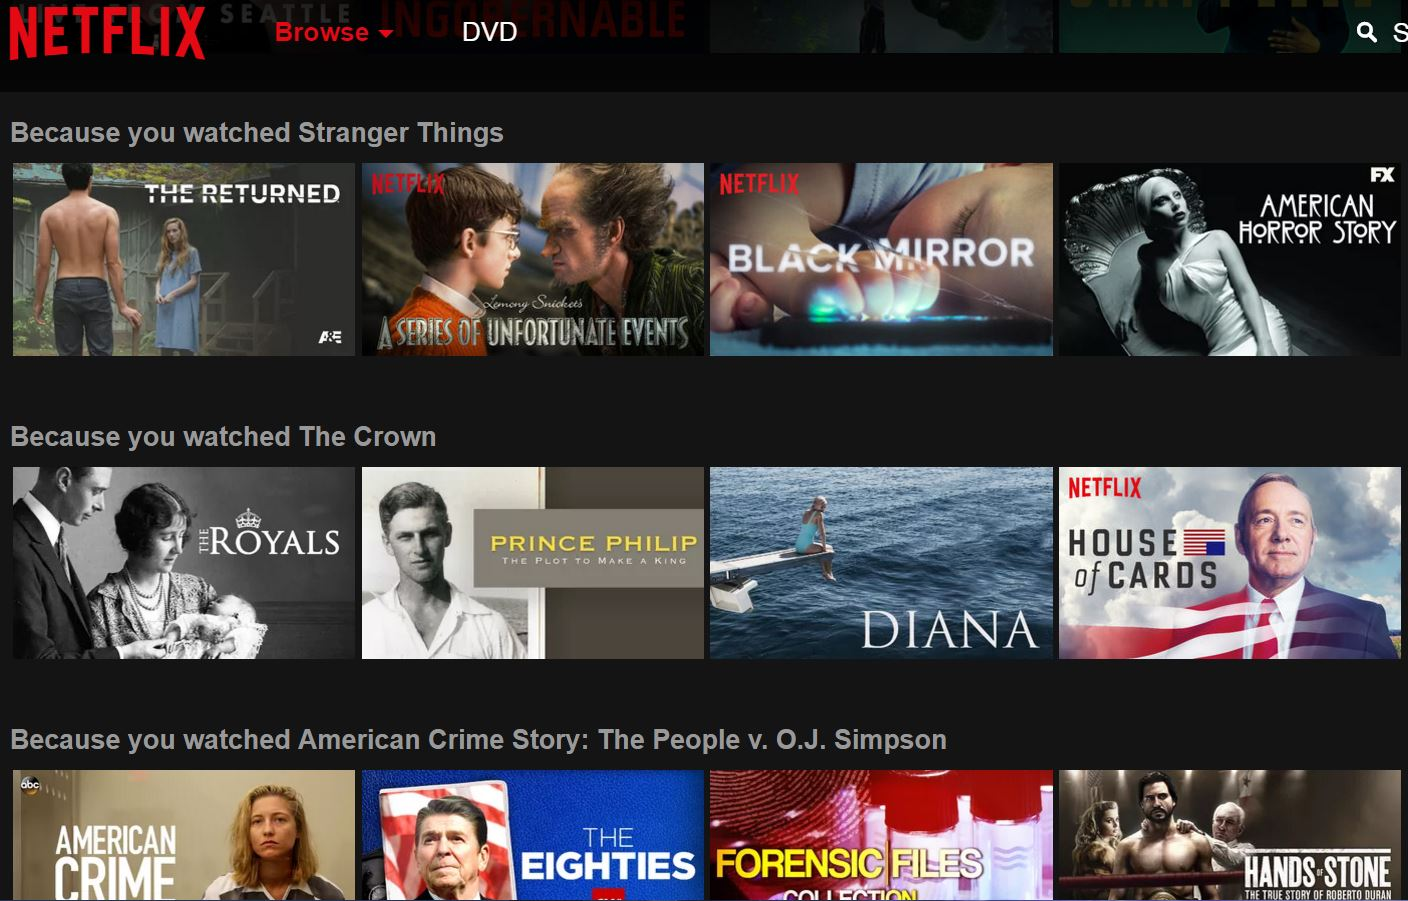

Another Example : A recommendation engine filters the data using different algorithms and recommends the most relevant items to users. It first captures the past behavior of a customer and based on that, recommends products which the users might be likely to buy.

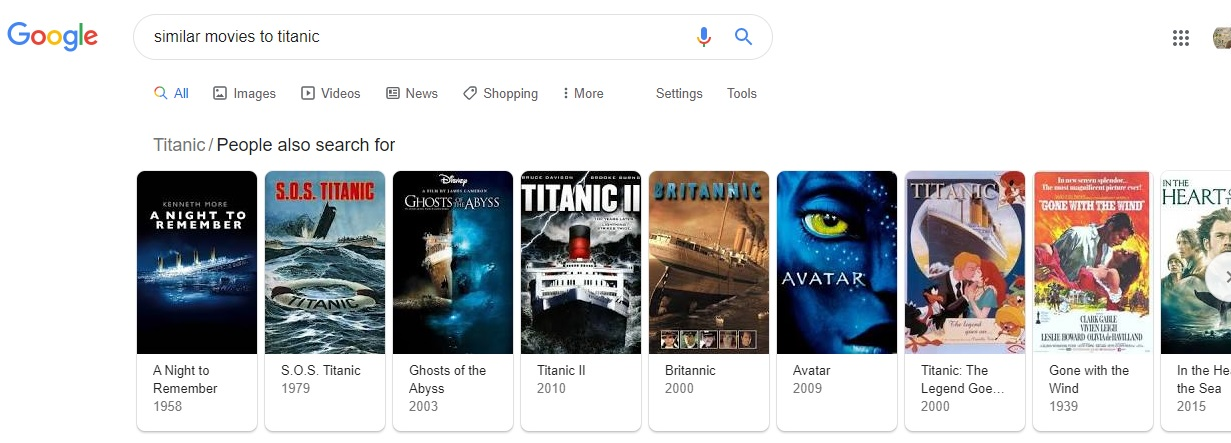

### There are 3 types of recommendation engines

    * Popularity Based Recommendation
This is the simplest kind of recommendation engine that you will come across. The trending list you see in YouTube or Netflix is based on this algorithm. It keeps a track of view counts for each movie/video and then lists movies based on views in descending order(highest view count to lowest view count)
    * Content Based Recommendation Engine
This type of recommendation systems, takes in a movie that a user currently likes as input. Then it analyzes the contents (storyline, genre, cast, director etc.) of the movie to find out other movies which have similar content. Then it ranks similar movies according to their similarity scores and recommends the most relevant movies to the user.
    * Collaborative Filtering Based Recommendation Engine
This algorithm at first tries to find similar users based on their activities and preferences (for example, both the users watch same type of movies or movies directed by the same director). Now, between these users(say, A and B) if user A has seen a movie that user B has not seen yet, then that movie gets recommended to user B and vice-versa. In other words, the recommendations get filtered based on the collaboration between similar user’s preferences (thus, the name “Collaborative Filtering”). One typical application of this algorithm can be seen in the Amazon e-commerce platform, where you get to see the “Customers who viewed this item also viewed” and “Customers who bought this item also bought” list.    

__We will go through content based and collaborative filtering based recommendation engines.__

**********************************************************************

In [1]:
import numpy as np
import pandas as pd

### Content Based Recommendation Engine

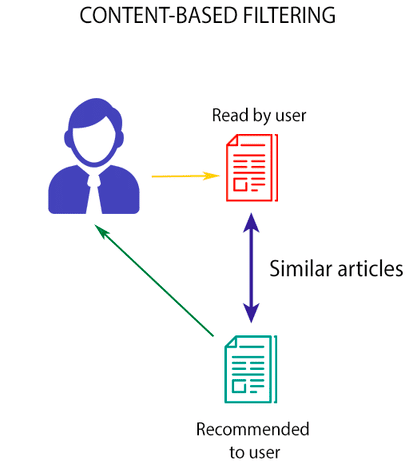

In this we have 2 datasets you will get the idea about the datasets below

### Method 1

In [2]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies_df = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
print(credits.shape)
print(movies_df.shape)

(4803, 4)
(4803, 20)


In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies_df.shape

(4803, 20)

In [6]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
# making the column name same for merging the two datasets
credits = credits.rename(index = str,columns = {'movie_id':'id'})

In [8]:
# merging the datasets
movies = movies_df.merge(credits,on = 'id')

In [9]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
# drop the unnecessary columns
movies = movies.drop(['homepage','title_x','title_y','status','production_countries'],1)

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
tagline                 3959 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
cast                    4803 non-null object
crew                    4803 non-null object
dtypes: float64(3), int64(4), object(11)
memory usage: 712.9+ KB


##### Note : 
The Overview feature in the dataset is the heart of this recommendation engine. As this feature includes the overall summary about the movie.              

In [12]:
movies['overview'].head(1)

0    In the 22nd century, a paraplegic Marine is di...
Name: overview, dtype: object

To create a recommendation we need to create a vectors of matrix for each movies.

To play with NLP concepts or we can say to understand or create vector of matrix so that
our overview column can be converted into machine understable format, for this we will be using 
TF-IDF (Term frequency–inverse document frequency)

In [13]:

from sklearn.feature_extraction.text import TfidfVectorizer

TF-IDF is a technique which will help us to create a document matrix for those types of sentences.
Document matrix is nothing but vector of sentences

In [14]:
tfv = TfidfVectorizer(stop_words='english',min_df = 3,max_features=None, strip_accents='unicode',
                     analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3))
# ngram_range will take the combination of 1 to 3 different kind of words
# stopwords is used to ignore words like 'the','a','is', etc types of words
# strip_accents, analyzer and token_pattern are used to remove unnecessary letters like '!',',',''
# meaning special symbols
# fill the null values.
movies['overview'] = movies['overview'].fillna('')

In [15]:
tfv_matrix = tfv.fit_transform(movies['overview'])

In [31]:
tfv_matrix

<4803x10417 sparse matrix of type '<class 'numpy.float64'>'
	with 127220 stored elements in Compressed Sparse Row format>

Here we can see that a sparse matrix is created which has many 0's inside it

In [30]:
tfv_matrix.shape

(4803, 10417)

After that we will be using sigmoid kernel as we know sigmoid is nothing but a S like curve between 0 to 1.

So sigmoid will just convert the values between 0 and 1.

Suppose we are finding sigmoid value of sentence 1 and sentence 2 from overview column we will get a value. Lets say 0.5 , this will indicate that movie1 is half similar to movie 2.

Sigmoid basically gives us the similarity score of the vector matrix that we had created above

In [17]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)

I know you are thinking why we have given tfv matrix with tfv matrix. This is because so that I can generate a dataframe of the similarity scores with each movie and many would have null values because of null similarity.

In [18]:

sig[0]

array([0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [19]:
# Lets give indexes to the movie
indices = pd.Series(movies.index, index = movies['original_title']).drop_duplicates()

In [20]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [35]:
# index of the maze runner
indices['The Maze Runner']

1465

#### This is the function for content based recommendation system

In [38]:
def recommend(title, sig = sig):
    # Here title is in text and we will get the respective index assigned to it
    index = indices[title]
    # lets calculate the sigmoid scores of this movie with every other movie.
    sigmoid_scores = list(enumerate(sig[index]))
    # Sort it descending so that top correlated can be listed on top
    sigmoid_scores = sorted(sigmoid_scores,key = lambda x: x[1], reverse = True)
    # We will take only top 5 recommendations
    sigmoid_scores = sigmoid_scores[1:6]
    
    movie_indices = [i[0] for i in sigmoid_scores]
    
    return movies['original_title'].iloc[movie_indices]

In [66]:
print(' Top Recommendations for this Movie is : ')
recommend('The Dark Knight')

 Top Recommendations for this Movie is : 


3                         The Dark Knight Rises
299                              Batman Forever
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
1359                                     Batman
Name: original_title, dtype: object

Lets try one more time

In [44]:
print('Recommendation for the Fast and furious 5 : \n',recommend('Fast Five'))

Recommendation for the Fast and furious 5 : 
 99      The Fast and the Furious
500             2 Fast 2 Furious
3790        An Everlasting Piece
202                        Rio 2
44                     Furious 7
Name: original_title, dtype: object


__With this type of basic recommendation engine, I hope you should have some questions after seeing the recommendations. Post a comment if you could identify what are the problems and what type of recommendations we can expect.__

In the above method we have TF-IDF for vectorizing and used sigmoid for similarity scoring.

### Method 2

Now in this method of Content Based Filtering we will use the same data set above 

But this time for vectorizing we will use ___Count Vectorizer___.

And for similarity scoring we will use ___Cosine Similarity___

In [46]:
# lets import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

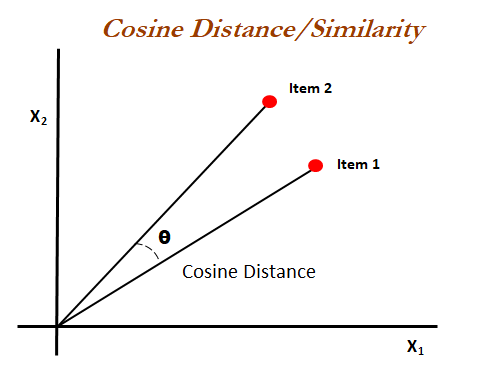

Here the angle between item 1 and item 2 is known as cosine simalrity which lies between 0 to 1 in the first quadrant. 

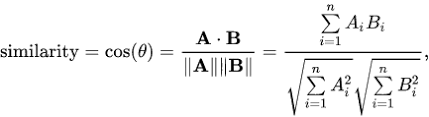

In [47]:
# dataset
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [48]:
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(movies['overview'])

In [50]:
cv_matrix.shape

(4803, 20978)

In [51]:
cv_matrix

<4803x20978 sparse matrix of type '<class 'numpy.int64'>'
	with 125840 stored elements in Compressed Sparse Row format>

Again we got a sparse matrix that we have seen in tfidf vectorizer also but this time the counts are mainly focused.

In [52]:
cos_similarity = cosine_similarity(cv_matrix)

In [56]:
cos_similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.03984095, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.02981424, 0.        ,
        0.        ],
       ...,
       [0.        , 0.03984095, 0.02981424, ..., 1.        , 0.04348854,
        0.02328101],
       [0.        , 0.        , 0.        , ..., 0.04348854, 1.        ,
        0.04556057],
       [0.        , 0.        , 0.        , ..., 0.02328101, 0.04556057,
        1.        ]])

In [57]:
## Again lets take the indexes
indexes = pd.Series(movies.index, index = movies['original_title']).drop_duplicates()

As we can see we are getting the values in between 0 and 1, mostly are 0's

In [58]:
def recommend_m2(title,cos = cos_similarity):
    index = indexes[title]
    
    similarity_score = list(enumerate(cos_similarity[index]))
    
    similarity_score = sorted(similarity_score, reverse = True,key = lambda x:x[1])
    
    similarity_score = similarity_score[1:6]
    
    movie_indexes = [i[0] for i in similarity_score]
    
    return movies['original_title'].iloc[movie_indexes]
    
    

In [59]:
recommend_m2('Fast Five')

99      The Fast and the Furious
866           Bullet to the Head
4802           My Date with Drew
4100                     Captive
2639                 Banlieue 13
Name: original_title, dtype: object

In [64]:
recommend_m2('The Maze Runner')

154                 Rise of the Guardians
117     Charlie and the Chocolate Factory
1617                                    9
4774                       Pink Narcissus
1974                    Girl, Interrupted
Name: original_title, dtype: object

In [63]:
recommend_m2('Star Wars')

1990     The Empire Strikes Back
1490          Return of the Jedi
1290    Baahubali: The Beginning
410                Mirror Mirror
833                Shanghai Noon
Name: original_title, dtype: object

So by this time when i got those results I wanted to check on google what google recommends.

Just check this out

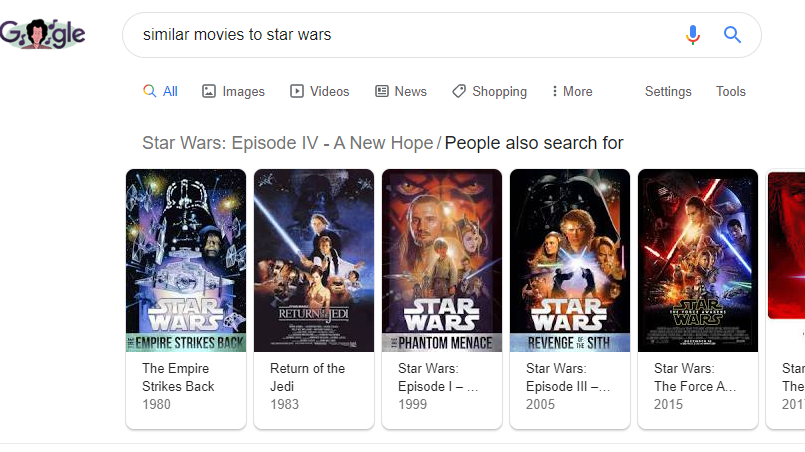





So we can see we got some good recommendations on those movies with method 2 of content based filtering.

__This was the recommendation engine based on content based filtering__
*************
__********TMDB MOVIES Dataset********__
****************
__Soon will be uploading a kernel on collaborative based filtering__
***********
__Any comments/feedbacks are most welcome__
***********
__Thanx for visiting my kernel__
